In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
symbol = str(input("Enter stock symbol"))
period1 = int(time.mktime(datetime.datetime(1971, 2, 5, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime.today().timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

Enter stock symbolNVDA


In [4]:
df = pd.read_csv(query_string)
df.to_csv(f'{symbol}.csv')

In [7]:
df = pd.read_csv(f"{symbol}.csv")
del df["Unnamed: 0"]
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376237,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415653,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383404,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382210,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381015,22752000
...,...,...,...,...,...,...,...
6342,2024-04-08,887.000000,888.299988,867.320007,871.330017,871.330017,28322000
6343,2024-04-09,874.419983,876.349976,830.219971,853.539978,853.539978,50354700
6344,2024-04-10,839.260010,874.000000,837.090027,870.390015,870.390015,43192900
6345,2024-04-11,874.200012,907.390015,869.260010,906.159973,906.159973,43163700


<Axes: xlabel='Date'>

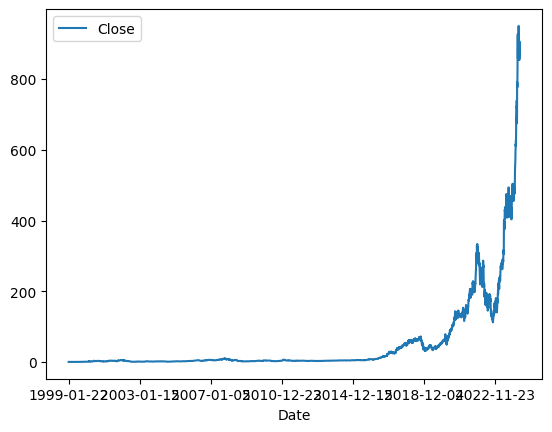

In [6]:
df.plot.line(x = "Date", y = "Close")

In [8]:
del df["Adj Close"]
df["Target-3"] = df["Close"].shift(3)
df["Target-2"] = df["Close"].shift(2)
df["Target-1"] = df["Close"].shift(1)
df["Target"] = ((df["Close"] - df["Open"]) > 0).astype(int)
df.set_index('Date', inplace = True)
df = df.dropna()

In [ ]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = df.rolling(horizon).mean()

  ratio = f"Close_Ratio_{horizon}"
  df[ratio] = df["Close"] / rolling_averages["Close"]

  trend = f"Trend_Ratio"
  df[trend] = df.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio, trend]

In [10]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,Target-3,Target-2,Target-1,Target,Close_Ratio_2,Trend_Ratio,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000
Date,,,,,,,,,,,,,,,
2003-01-21,0.912500,0.931667,0.870833,0.873333,96735600,0.998333,0.930833,0.895833,0,0.987282,453.0,0.923511,0.792348,0.406732,0.415130
2003-01-22,0.870833,0.896667,0.868333,0.874167,55099200,0.930833,0.895833,0.873333,1,1.000477,453.0,0.955896,0.793075,0.410636,0.415436
2003-01-23,0.897500,0.912500,0.874167,0.898333,91845600,0.895833,0.873333,0.874167,1,1.013634,454.0,1.004285,0.815328,0.425633,0.426818
2003-01-24,0.890833,0.895000,0.832500,0.847500,89710800,0.873333,0.874167,0.898333,0,0.970883,455.0,0.965445,0.770153,0.405248,0.402582
2003-01-27,0.829167,0.872500,0.814167,0.835000,88911600,0.874167,0.898333,0.847500,1,0.992571,454.0,0.964575,0.759417,0.402779,0.396557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,887.000000,888.299988,867.320007,871.330017,28322000,889.640015,859.049988,880.080017,0,0.995004,515.0,0.991360,1.136875,1.726804,3.388841
2024-04-09,874.419983,876.349976,830.219971,853.539978,50354700,859.049988,880.080017,871.330017,0,0.989686,514.0,0.980260,1.106318,1.683781,3.309605
2024-04-10,839.260010,874.000000,837.090027,870.390015,43192900,880.080017,871.330017,853.539978,1,1.009774,514.0,1.004051,1.120334,1.708857,3.364522


In [11]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1] # Predict_proba returns the probability of it being a 1 or 0
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [12]:
def backtesting(data, model, predictors, start = 1250, step = 250):
  all_preds = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    all = predict(train, test, predictors, model)
    all_preds.append(all)

  return pd.concat(all_preds)

In [13]:
RFC_model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [14]:
predictions = backtesting(df, RFC_model, new_predictors)

In [15]:
predictions["Predictions"].value_counts()

Predictions
0.0    2314
1.0    1780
Name: count, dtype: int64

In [16]:
predictions

,Target,Predictions
Date,,
2008-01-08,1,1.0
2008-01-09,1,1.0
2008-01-10,1,0.0
2008-01-11,0,0.0
2008-01-14,1,1.0
...,...,...
2024-04-08,0,0.0
2024-04-09,0,0.0
2024-04-10,1,1.0


In [17]:
print(classification_report(predictions["Target"], predictions["Predictions"]))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      2019
           1       0.88      0.76      0.81      2075

    accuracy                           0.83      4094
   macro avg       0.83      0.83      0.82      4094
weighted avg       0.83      0.83      0.82      4094



In [18]:
tomorrow_data = df.iloc[[-1]]
tomorrow_prediction = RFC_model.predict(tomorrow_data[new_predictors])
if tomorrow_prediction == 1:
    print("Tomorrow's price is predicted to go up.")
else:
    print("Tomorrow's price is predicted to go down.")

Tomorrow's price is predicted to go down.
